## sklearn 逻辑回归模型拟合
1. 加载数据

In [12]:
# 导入所需的库
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 读取数据
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
print(data.head())

X = data.iloc[:, :2]  # 特征矩阵(第一次和第二次测试分数)
y = data.iloc[:, 2]   # 目标向量(录取结果)
print(X.shape, y.shape)

      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
(100, 2) (100,)


2. 划分训练与测试集

In [13]:

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. 逻辑回归模型拟合与评估模型

In [14]:
# 创建逻辑回归模型并进行训练
model = LogisticRegression()
model.fit(X_train, y_train)

# 在测试集上评估模型
accuracy_train = model.score(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"逻辑回归模型训练集准确率: {accuracy_train}")
print(f"逻辑回归模型测试集准确率: {accuracy}")

逻辑回归模型训练集准确率: 0.9125
逻辑回归模型测试集准确率: 0.8


4. 绘制图像及决策边界

d:\anaconda\envs\pythonStudy\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


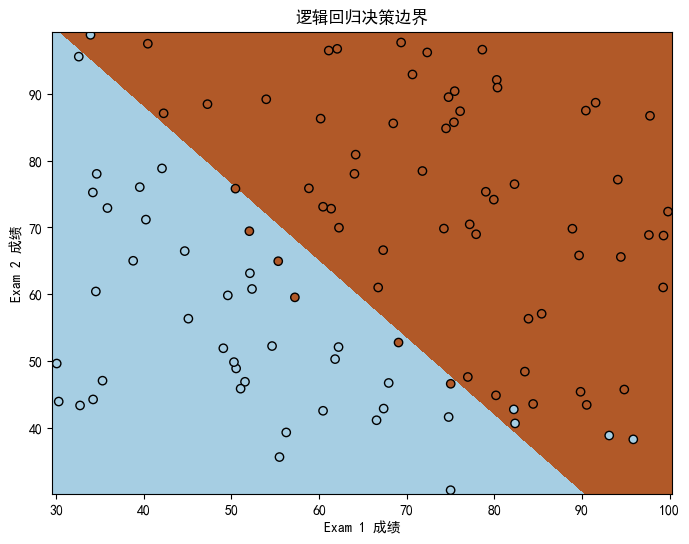

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 获取决策边界
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # 步长
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 绘制散点图和决策边界
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 绘制训练数据点
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Exam 1 成绩')
plt.ylabel('Exam 2 成绩')
plt.title('逻辑回归决策边界')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## 自己写损失函数及梯度函数

初始代价函数计算结果 0.6931471805599453
代价函数计算结果 0.20349770158947447
accuracy = 89%


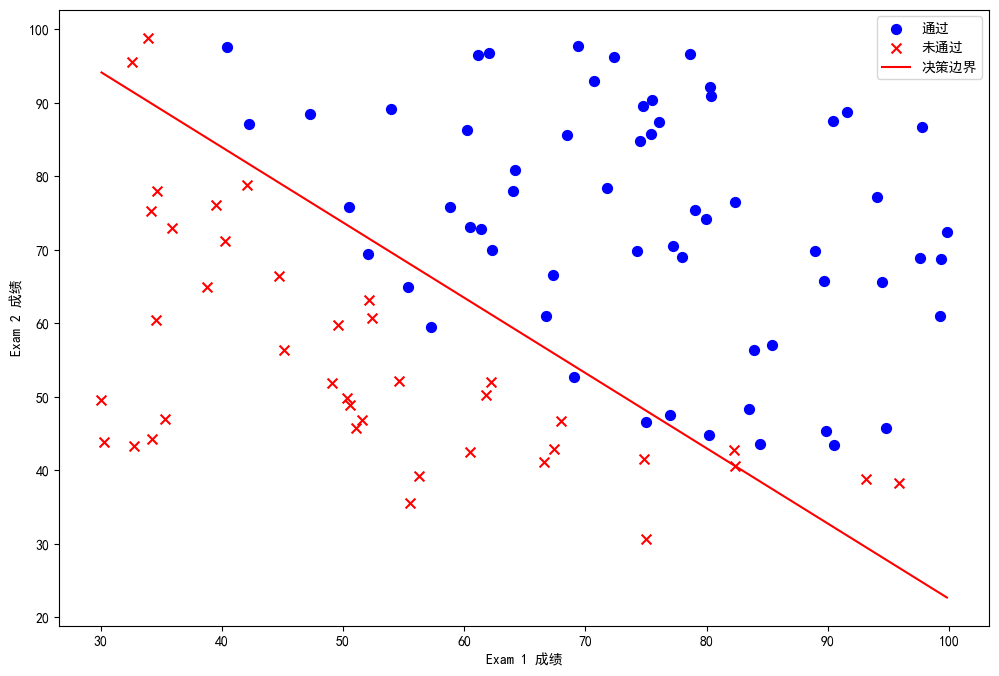

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 定义代价函数
def cost(w, X, y):
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * w.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * w.T)))
    return np.sum(first - second) / (len(X))


data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

X = np.array(X.values)
y = np.array(y.values)
w = np.zeros(3)

# 计算初始化参数的代价函数w=0
print("初始代价函数计算结果", cost(w, X, y))

# 梯度下降函数
def gradient(w, X, y):
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(w.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * w.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)

    return grad

result = opt.fmin_tnc(func=cost, x0=w, fprime=gradient, args=(X, y))

print("代价函数计算结果", cost(result[0], X, y))

# 预测函数
def predict(w, X):
    probability = sigmoid(X * w.T)
    return [1 if x >= 0.5 else 0 for x in probability]

# 计算准确率
w_min = np.matrix(result[0])
predictions = predict(w_min, X)
correct = [
    1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0
    for (a, b) in zip(predictions, y)
]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))


# 绘制决策边界
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

x_axis= np.array([data['Exam 1'].min(), data['Exam 1'].max()])
y_axis = (-1./result[0][2])*(result[0][0] + result[0][1]*x_axis)

ax.scatter(positive['Exam 1'],
           positive['Exam 2'],
           s=50,
           c='b',
           marker='o',
           label='通过')
ax.scatter(negative['Exam 1'],
           negative['Exam 2'],
           s=50,
           c='r',
           marker='x',
           label='未通过')

plt.plot(x_axis, y_axis, c='r', label='决策边界')

ax.legend()
ax.set_xlabel('Exam 1 成绩')
ax.set_ylabel('Exam 2 成绩')
plt.show()

## 双曲线模型拟合
使用线性拟合无论怎样调整，其准确率都太低；
由于决策边缘类似双曲线，所以使用双曲线来简单拟合

1. 读取数据

In [6]:
# 导入所需的库
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 读取数据
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
print(data.head())

X = data.iloc[:, :2]  # 特征矩阵(第一次和第二次测试分数)
y = data.iloc[:, 2]   # 目标向量(录取结果)
print(X.shape, y.shape)


# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 读取数据
numsX = X.values
numsy = y.values

passed = [] # 通过的
failed = [] # 没有通过的

# 计算边界
for i in range(len(numsX)):
    if numsy[i] == 1:
        passed.append(numsX[i][0]*numsX[i][1])
    else:
        failed.append(numsX[i][0]*numsX[i][1])


      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
(100, 2) (100,)


2. 计算边界

In [7]:
passed.sort()
failed.sort()
print(passed[0],failed[-1])

# 简单取边界的折中值
b= (passed[0] + failed[-1])/2
print(b)

3406.5205078503104 3664.3345976540945
3535.4275527522022


3. 计算准确率

In [8]:
X_test_nums = X_test.values
y_test_nums = y_test.values

correct_train = 0
# 训练集准确率
for i in range(len(X_train)):
    if X_train.values[i][0]*X_train.values[i][1] > b:
        if y_train.values[i] == 1:
            correct_train += 1
    else:
        if y_train.values[i] == 0:
            correct_train += 1

correct = 0
# 测试集准确率
for i in range(len(X_test_nums)):
    if X_test_nums[i][0]*X_test_nums[i][1] > b:
        if y_test_nums[i] == 1:
            correct += 1
    else:
        if y_test_nums[i] == 0:
            correct += 1
train_accuracy = correct_train/len(X_train)
test_accuracy = correct/len(X_test_nums)
print(f"双曲线模型训练集准确率: {train_accuracy}")
print(f"双曲线模型测试集准确率: {test_accuracy}")

双曲线模型训练集准确率: 0.975
双曲线模型测试集准确率: 0.9


4. 画出 xy + b = 0的决策边界

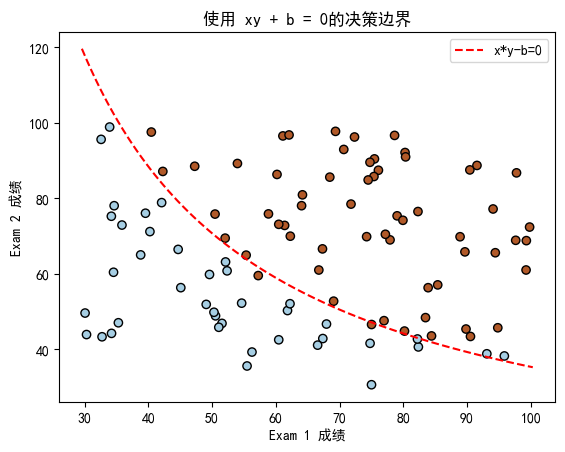

In [11]:
# 绘制训练数据点
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Exam 1 成绩')
plt.ylabel('Exam 2 成绩')
plt.title('使用 xy + b = 0的决策边界')

# 获取决策边界
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # 步长

# 绘制函数 x * y - b = 0
x_func = np.linspace(x_min, x_max, 100)  # 生成x值
y_func = b / x_func  # 计算对应的y值
plt.plot(x_func, y_func, 'r--', label='x*y-b=0')  # 绘制函数曲线，使用红色虚线
plt.legend()  # 显示图例

plt.show()

## 比较 逻辑回归决策边界 与 xy + b = 0的决策边界

d:\anaconda\envs\pythonStudy\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


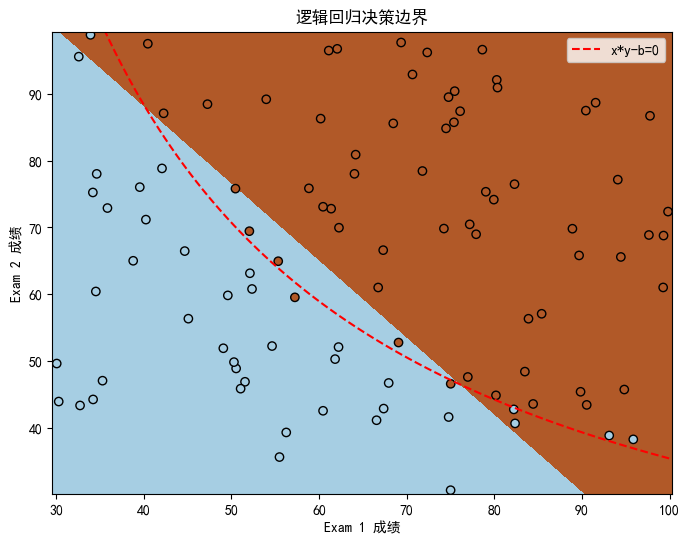

In [30]:
# 获取决策边界
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # 步长
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 绘制散点图和决策边界
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 绘制训练数据点
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Exam 1 成绩')
plt.ylabel('Exam 2 成绩')
plt.title('逻辑回归决策边界')

# 绘制函数 x * y - b = 0
x_func = np.linspace(x_min, x_max, 100)  # 生成x值
y_func = b / x_func  # 计算对应的y值
plt.plot(x_func, y_func, 'r--', label='x*y-b=0')  # 绘制函数曲线，使用红色虚线
plt.legend()  # 显示图例

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


准确率对比

In [49]:

print(f"逻辑回归模型训练集准确率: {accuracy_train}")
print(f"逻辑回归模型测试集准确率: {accuracy}")

print(f"双曲线模型训练集准确率: {train_accuracy}")
print(f"双曲线模型测试集准确率: {test_accuracy}")

逻辑回归模型训练集准确率: 0.9125
逻辑回归模型测试集准确率: 0.8
双曲线模型训练集准确率: 0.975
双曲线模型测试集准确率: 0.9
